<a href="https://colab.research.google.com/github/tanyalondon/Sports-Team/blob/main/DLTechnicalTaskCalculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow:
1. Exploratory data analysis  
2. Getting the data ready
3. Choose the model/estimator for the problem
4. Fit the model and use it to make predictions
5. Evaluate model
6. Improve model
7.Putting it all together 

In [1]:
#Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
history = pd.read_excel('/content/Copy of 202304_DL_DStechnicalTask_Data.xlsx', sheet_name='HistoricalData')
targets = pd.read_excel('/content/Copy of 202304_DL_DStechnicalTask_Data.xlsx',sheet_name='MembersToBeTargeted')

In [3]:
history.head()

,record_id,age,length_of_membership_in_months,contract_type,reporting_grouping,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag,cancelled_membership_this_month
0,1,35.0,56.0,Standard,Full,76.666664,7,4,7,1,1
1,2,49.0,52.0,Standard,H&F,59.166668,18,1,0,0,1
2,3,41.0,56.0,Standard,H&F,78.333336,4,3,3,0,1
3,4,46.0,31.0,Standard,Other,62.500000,61,0,0,0,1
4,5,28.0,6.0,Standard,Plus,82.500000,61,0,0,1,1


In [4]:
targets.head()

,record_id,age,length_of_membership_in_months,contract_type,reporting_grouping,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag
0,1,17,20,Standard,Child,36.861076,60,0,1,1
1,2,56,376,Standard,H&F,67.500000,1,30,27,1
2,3,4,23,Standard,Child,15.000000,35,0,1,0
3,4,54,64,Standard,Other,60.375000,22,1,3,1
4,5,39,13,Standard,Other,48.333332,12,2,0,1


In [5]:
check_dupl = history.drop(["record_id"], axis=1)
check_dupl.head()

,age,length_of_membership_in_months,contract_type,reporting_grouping,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag,cancelled_membership_this_month
0,35.0,56.0,Standard,Full,76.666664,7,4,7,1,1
1,49.0,52.0,Standard,H&F,59.166668,18,1,0,0,1
2,41.0,56.0,Standard,H&F,78.333336,4,3,3,0,1
3,46.0,31.0,Standard,Other,62.500000,61,0,0,0,1
4,28.0,6.0,Standard,Plus,82.500000,61,0,0,1,1


1. Exploratory data analysis

In [6]:
#exploratory data analysis
history_cancelled = history[history.cancelled_membership_this_month == 1]
history_cancelled.describe()

,record_id,age,length_of_membership_in_months,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag,cancelled_membership_this_month
count,5043.000000,4959.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.0
mean,2522.000000,31.063118,32.090422,77.261558,27.206425,3.283165,3.182431,0.438033,1.0
std,1455.933034,18.516476,40.222129,1738.082131,24.573103,4.553260,4.421562,0.496194,0.0
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,1261.500000,15.000000,9.000000,25.000000,4.000000,0.000000,0.000000,0.000000,1.0
50%,2522.000000,32.000000,17.000000,53.986710,17.000000,1.000000,1.000000,0.000000,1.0
75%,3782.500000,45.000000,38.000000,73.333336,61.000000,5.000000,5.000000,1.000000,1.0
max,5043.000000,88.000000,383.000000,123456.992188,62.000000,30.000000,31.000000,1.000000,1.0


From an initial exploration of the data, we observe that 50% of those who cancelled had not attended in 17 days or more, compared to only 7 days for those who haven't canceled their membership.  In each of the two month before cancelling, half of members attended 1 day or less, compared to those who didn't cancel, half of them attended 3 days or less the month before and 4 days the second month previous.





array([[<Axes: title={'center': 'record_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'length_of_membership_in_months'}>],
       [<Axes: title={'center': 'monthly_membership_fee'}>,
        <Axes: title={'center': 'attendance_recency_in_days'}>,
        <Axes: title={'center': 'attendance_two_months_ago'}>],
       [<Axes: title={'center': 'attendance_last_month'}>,
        <Axes: title={'center': 'ex_member_flag'}>,
        <Axes: title={'center': 'cancelled_membership_this_month'}>]],
      dtype=object)

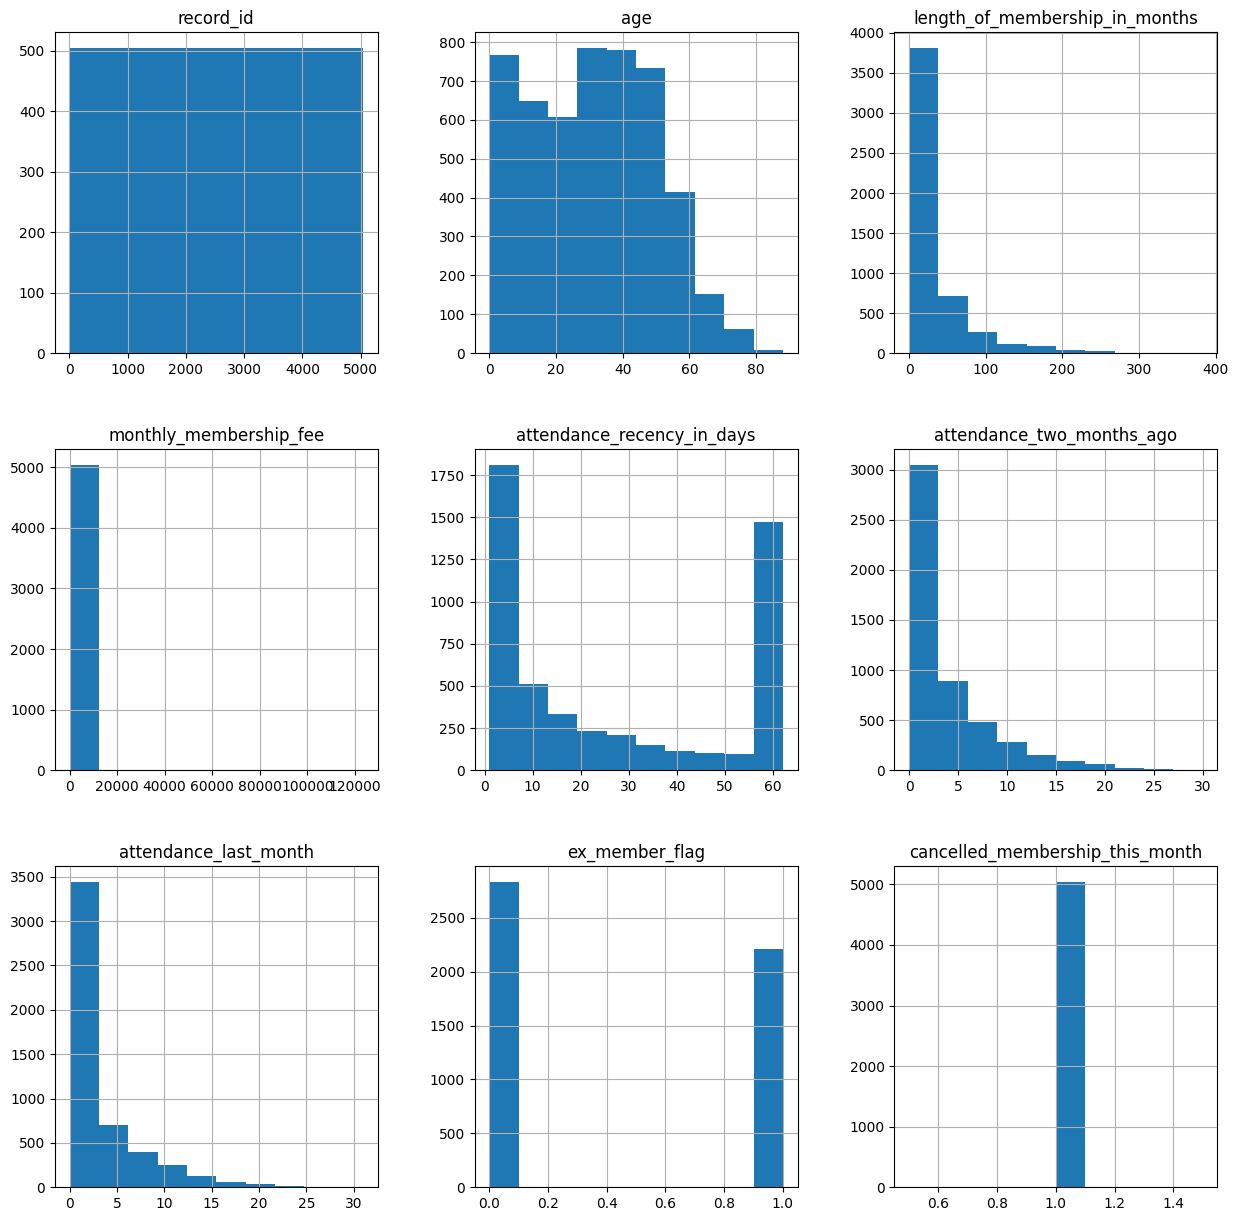

In [7]:
history_cancelled.hist(figsize=(15,15))


In [8]:
history_remain = history[history.cancelled_membership_this_month == 0]
history_remain.describe()

,record_id,age,length_of_membership_in_months,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag,cancelled_membership_this_month
count,234957.000000,231041.000000,234956.000000,234957.000000,234957.000000,234957.000000,234957.000000,234957.000000,234957.0
mean,122522.000000,35.412100,50.281482,56.841589,19.151032,5.241133,4.655473,0.448418,0.0
std,67826.387936,20.290933,61.459908,510.330326,22.635037,5.667187,5.379894,0.497333,0.0
min,5044.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,63783.000000,17.000000,9.000000,29.166666,2.000000,0.000000,0.000000,0.000000,0.0
50%,122522.000000,38.000000,26.000000,54.750675,7.000000,4.000000,3.000000,0.000000,0.0
75%,181261.000000,51.000000,67.000000,74.166664,32.000000,8.000000,7.000000,1.000000,0.0
max,240000.000000,119.000000,876.000000,123456.992188,62.000000,31.000000,31.000000,1.000000,0.0


array([[<Axes: title={'center': 'record_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'length_of_membership_in_months'}>],
       [<Axes: title={'center': 'monthly_membership_fee'}>,
        <Axes: title={'center': 'attendance_recency_in_days'}>,
        <Axes: title={'center': 'attendance_two_months_ago'}>],
       [<Axes: title={'center': 'attendance_last_month'}>,
        <Axes: title={'center': 'ex_member_flag'}>,
        <Axes: title={'center': 'cancelled_membership_this_month'}>]],
      dtype=object)

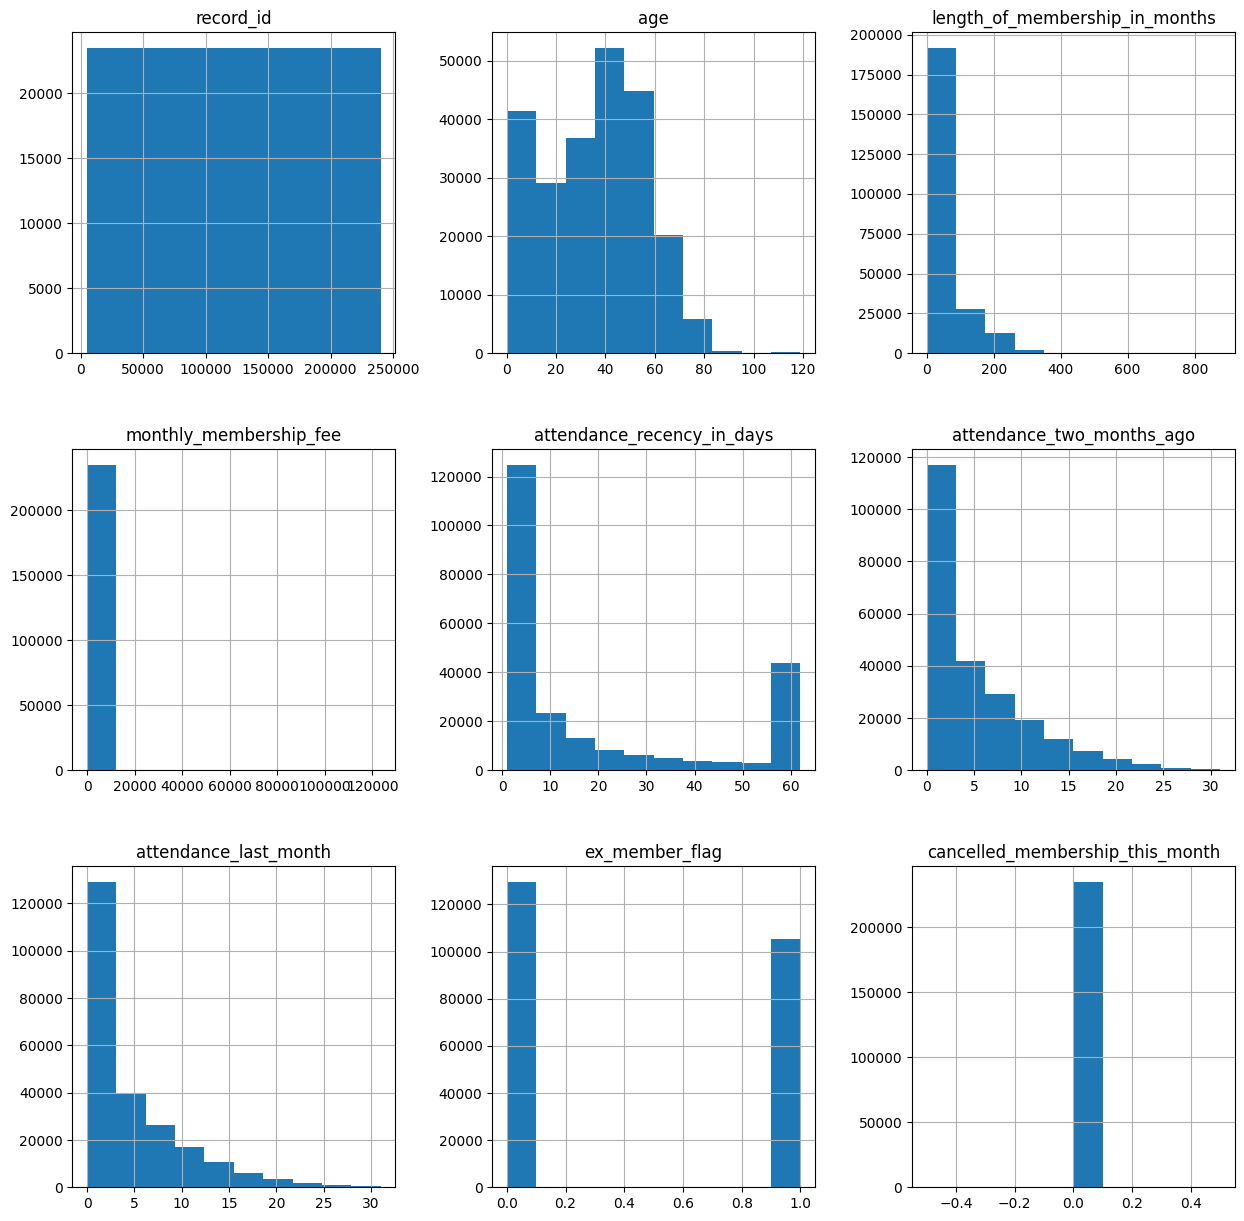

In [9]:
history_remain.hist(figsize=(15,15))

2. Getting the data ready:



i. split data into features and labels

ii. filling or imputng missing values

iii. feature encoding




i. split data into features and labels

In [10]:
#check balance of labels - unbalanced so must be taken into account in ML model
(history['cancelled_membership_this_month']==0).sum()

234957

In [11]:
(history['cancelled_membership_this_month']==1).sum()

5043

In [12]:
# Create feature matrix X
X = history.drop(["record_id","cancelled_membership_this_month"], axis=1)
X.head()

,age,length_of_membership_in_months,contract_type,reporting_grouping,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag
0,35.0,56.0,Standard,Full,76.666664,7,4,7,1
1,49.0,52.0,Standard,H&F,59.166668,18,1,0,0
2,41.0,56.0,Standard,H&F,78.333336,4,3,3,0
3,46.0,31.0,Standard,Other,62.500000,61,0,0,0
4,28.0,6.0,Standard,Plus,82.500000,61,0,0,1


In [13]:
#Create label matrix y
y= history["cancelled_membership_this_month"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: cancelled_membership_this_month, dtype: int64

In [14]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#X_train.head()


((192000, 9), (48000, 9), (192000,), (48000,))

ii. filling or imputng missing values

In [16]:
#missing valuesin train and test sets will be imputed separately
X_test.isna().sum()

age                               765
length_of_membership_in_months      0
contract_type                       0
reporting_grouping                  0
monthly_membership_fee              0
attendance_recency_in_days          0
attendance_two_months_ago           0
attendance_last_month               0
ex_member_flag                      0
dtype: int64

In [17]:
X_train.isna().sum()

age                               3235
length_of_membership_in_months       1
contract_type                        0
reporting_grouping                   0
monthly_membership_fee               0
attendance_recency_in_days           0
attendance_two_months_ago            0
attendance_last_month                0
ex_member_flag                       0
dtype: int64

In [20]:
#impute missing ag with mean
X_test.fillna({"age":X_test["age"].mean()}, inplace=True)

In [21]:
#check result
X_test.isna().sum()

age                               0
length_of_membership_in_months    0
contract_type                     0
reporting_grouping                0
monthly_membership_fee            0
attendance_recency_in_days        0
attendance_two_months_ago         0
attendance_last_month             0
ex_member_flag                    0
dtype: int64

In [22]:
#imote missing valueswith mean of respectie column
X_train.fillna({"age":X_test["age"].mean(), "length_of_membership_in_months":X_test["length_of_membership_in_months"].mean()}, inplace=True)

In [24]:
X_train.isna().sum()

age                               0
length_of_membership_in_months    0
contract_type                     0
reporting_grouping                0
monthly_membership_fee            0
attendance_recency_in_days        0
attendance_two_months_ago         0
attendance_last_month             0
ex_member_flag                    0
dtype: int64

iii. feature encoding

In [25]:
X.dtypes

age                               float64
length_of_membership_in_months    float64
contract_type                      object
reporting_grouping                 object
monthly_membership_fee            float64
attendance_recency_in_days          int64
attendance_two_months_ago           int64
attendance_last_month               int64
ex_member_flag                      int64
dtype: object

In [26]:
#Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#one hot encode the features 
categorical_features = ["contract_type", "reporting_grouping"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(X_train) # fit and transform the training data
transformed_X_test = transformer.transform(X_test) # transform the test data

# Check transformed and filled X_train
#transformed_X_train.toarray()

pd.DataFrame(transformed_X_test)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,0.0,64.016174,61.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,3.0,41.666668,2.0,8.0,12.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,17.0,12.500000,31.0,0.0,5.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.000000,61.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,136.0,23.750000,4.0,8.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,33.0,39.0,55.833332,61.0,0.0,0.0,1.0
47996,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,3.0,20.833334,6.0,10.0,13.0,1.0
47997,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,69.0,5.0,66.666664,61.0,0.0,0.0,1.0
47998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,32.0,42.073788,61.0,0.0,0.0,1.0


In [27]:
#sklearn onHotEncoder loses the dataFrame format. I prefer to use get_dummies in pandasto keep the DF format
X_test = pd.get_dummies(X_test)
X_test

,age,length_of_membership_in_months,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag,contract_type_Annual,contract_type_Flexible,contract_type_Standard,reporting_grouping_Child,reporting_grouping_Club,reporting_grouping_Full,reporting_grouping_H&F,reporting_grouping_Other,reporting_grouping_Platinum,reporting_grouping_Plus
149182,40.0,0.0,64.016174,61,0,0,1,0,0,1,0,0,0,0,0,0,1
60264,35.0,3.0,41.666668,2,8,12,1,0,0,1,0,1,0,0,0,0,0
60322,4.0,17.0,12.500000,31,0,5,1,0,0,1,1,0,0,0,0,0,0
111965,2.0,3.0,0.000000,61,0,0,0,0,0,1,1,0,0,0,0,0,0
98262,15.0,136.0,23.750000,4,8,7,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,33.0,39.0,55.833332,61,0,0,1,0,0,1,0,0,0,1,0,0,0
48370,18.0,3.0,20.833334,6,10,13,1,0,0,1,1,0,0,0,0,0,0
70677,69.0,5.0,66.666664,61,0,0,1,0,0,1,0,1,0,0,0,0,0
214376,27.0,32.0,42.073788,61,0,0,1,0,0,1,0,0,0,0,1,0,0


In [28]:
X_train = pd.get_dummies(X_train)
X_train

,age,length_of_membership_in_months,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag,contract_type_Annual,contract_type_Flexible,contract_type_Standard,reporting_grouping_Child,reporting_grouping_Club,reporting_grouping_Full,reporting_grouping_H&F,reporting_grouping_Other,reporting_grouping_Platinum,reporting_grouping_Plus
111182,46.0,16.0,44.166668,1,3,2,0,0,0,1,0,0,0,0,0,0,1
63421,44.0,2.0,83.333336,4,2,5,0,0,0,1,0,0,0,0,0,1,0
193257,0.0,3.0,0.000000,61,0,0,0,0,0,1,1,0,0,0,0,0,0
126368,40.0,3.0,50.000000,8,5,0,0,0,0,1,0,0,0,0,0,0,1
223919,23.0,12.0,64.197166,22,2,2,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16347,47.0,133.0,75.833336,4,11,12,1,0,0,1,0,0,1,0,0,0,0
143933,65.0,47.0,75.833336,15,1,0,1,0,1,0,0,0,0,1,0,0,0
170523,60.0,51.0,69.166664,5,12,15,1,0,0,1,0,0,1,0,0,0,0
25228,26.0,4.0,58.333332,2,15,16,1,0,0,1,0,0,0,0,0,1,0


In [29]:
X_train.shape

(192000, 17)

**3**. Selecting the model/estimator and make prediction



In [70]:
#Given the dataset we are analysing, sklearn model map suggests using a SGDC model (Stochastic Gradient Descent Classifier)
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler 
#scaler =StandardScaler()
#X_standard =scaler.fit_transform(X_train)
y_train_label = np.where((y_train==0),0,1)
clf_SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=100, random_state =0, class_weight="balanced")
clf_SGD.fit(X_train, y_train_label)


SGDClassifier(class_weight='balanced', max_iter=100, random_state=0)

In [71]:
y_preds_SGD = clf_SGD.predict(X_test)#make a prediction

In [72]:
y_preds_SGD.sum()

17535

5. Evaluate the model

In [52]:
clf_SGD.score(X_train, y_train)

0.6299427083333333

In [69]:
clf_SGD.score(X_test, y_test)

0.6337916666666666

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds_SGD))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81     46943
           1       0.03      0.41      0.05      1057

    accuracy                           0.68     48000
   macro avg       0.50      0.55      0.43     48000
weighted avg       0.96      0.68      0.79     48000



In [55]:
#The model ay predict the members who will cancel thus making savings on the attrition rate, 
#at the same time, the false positives appear high, potentially adding extra expense by offering two months free membership to those who wouldn't have cancelled.
confusion_matrix(y_test, y_preds_SGD)

array([[29915, 17028],
       [  550,   507]])

In [79]:
#Try with a log_loss loss function (this gives similar results to A Logistic Regression model)
y_train_label = np.where((y_train==0),0,1)
clf_SGD_log = SGDClassifier(loss="log_loss", penalty="l2", max_iter=20, random_state =0, class_weight="balanced")
clf_SGD_log.fit(X_train, y_train_label)

SGDClassifier(class_weight='balanced', loss='log_loss', max_iter=20,
              random_state=0)

In [80]:
y_preds_SGD_log = clf_SGD.predict(X_test)#make a prediction

In [81]:
y_preds_SGD_log.sum()

17535

In [76]:
clf_SGD_log.score(X_train, y_train)

0.6301666666666667

In [77]:
clf_SGD_log.score(X_test, y_test)

0.6342708333333333

In [68]:
confusion_matrix(y_test, y_preds_SGD_log)

array([[29915, 17028],
       [  550,   507]])

OTHER MODELS LOOKED AT

In [93]:
#Logistic Regression
#I looked at another classifier - Logistic regression
#All around did not perform as well. in particular had high false positives and very low precision for true positives
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()
X_standard =scaler.fit_transform(X_train)
#create decision tree classifier object
clf_LR = LogisticRegression(random_state=0, class_weight='balanced')
clf_LR.fit(X_standard, y_train_label)

LogisticRegression(class_weight='balanced', random_state=0)

In [95]:
X_test_standard = scaler.fit_transform(X_test)
y_preds_LR = clf_LR.predict(X_test_standard)

In [96]:
y_preds_LR.sum()

21001

In [97]:
confusion_matrix(y_test, y_preds_LR)

array([[26619, 20324],
       [  380,   677]])

In [98]:
print(classification_report(y_test, y_preds_LR))

              precision    recall  f1-score   support

           0       0.99      0.57      0.72     46943
           1       0.03      0.64      0.06      1057

    accuracy                           0.57     48000
   macro avg       0.51      0.60      0.39     48000
weighted avg       0.96      0.57      0.71     48000



In [ ]:
# Random Foret Classifier
from sklearn.ensemble import RandomForestClassifier

y_train_label = np.where((y_train==0),0,1)

In [ ]:
#create randomforest classifier object
clf_RF=RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

In [ ]:
#3. fit model to the training data
clf_RF.fit(X_train, y_train_label)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)

In [ ]:
y_preds_RF = clf_RF.predict(X_test)#make a prediction


In [ ]:
y_preds_RF.sum()

433

In [ ]:
y_preds_RF

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#4/evaluate the model
clf_RF.score(X_train, y_train_label)

0.9910572916666667

In [ ]:
clf_RF.score(X_test, y_test)

0.9704791666666667

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds_RF))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     46984
           1       0.04      0.02      0.02      1016

    accuracy                           0.97     48000
   macro avg       0.51      0.50      0.50     48000
weighted avg       0.96      0.97      0.96     48000



In [ ]:
confusion_matrix(y_test, y_preds_RF)

array([[46567,   417],
       [ 1000,    16]])

In [ ]:
accuracy_score(y_test, y_preds_RF)

0.9704791666666667

In [ ]:
#5. Improve a model - try different n_estimators
np.random.seed(42)
for i in range (10, 100, 10):
  print(f"trying {i} estimators")
#  clf =RandomForestClassifier(n_estimators=i)
  clf_RF=RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced", n_estimators=i).fit(X_train, y_train_label)
  y_preds_RF = clf_RF.predict(X_test)
  print(f"model accuracy on test set: {clf_RF.score(X_test, y_test)*100}%")
  print(f"cm:{confusion_matrix(y_test, y_preds_RF) }")
  

trying 10 estimators
model accuracy on test set: 97.10833333333333%
cm:[[46600   384]
 [ 1004    12]]
trying 20 estimators
model accuracy on test set: 97.02916666666667%
cm:[[46560   424]
 [ 1002    14]]
trying 30 estimators
model accuracy on test set: 97.08333333333333%
cm:[[46587   397]
 [ 1003    13]]
trying 40 estimators
model accuracy on test set: 97.06041666666667%
cm:[[46575   409]
 [ 1002    14]]
trying 50 estimators
model accuracy on test set: 97.04166666666667%
cm:[[46565   419]
 [ 1001    15]]
trying 60 estimators
model accuracy on test set: 97.08541666666667%
cm:[[46586   398]
 [ 1001    15]]
trying 70 estimators
model accuracy on test set: 97.03958333333334%
cm:[[46564   420]
 [ 1001    15]]
trying 80 estimators
model accuracy on test set: 97.07291666666666%
cm:[[46579   405]
 [ 1000    16]]
trying 90 estimators
model accuracy on test set: 97.04791666666667%
cm:[[46567   417]
 [ 1000    16]]


Use chosen model on target data to predict attrition

In [99]:
X_target = targets.drop(["record_id"], axis=1)
X_target.head()

,age,length_of_membership_in_months,contract_type,reporting_grouping,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag
0,17,20,Standard,Child,36.861076,60,0,1,1
1,56,376,Standard,H&F,67.500000,1,30,27,1
2,4,23,Standard,Child,15.000000,35,0,1,0
3,54,64,Standard,Other,60.375000,22,1,3,1
4,39,13,Standard,Other,48.333332,12,2,0,1


In [100]:
X_target.dtypes

age                                 int64
length_of_membership_in_months      int64
contract_type                      object
reporting_grouping                 object
monthly_membership_fee            float64
attendance_recency_in_days          int64
attendance_two_months_ago           int64
attendance_last_month               int64
ex_member_flag                      int64
dtype: object

In [101]:
#remove 'Diamond' reporting grouping as not part of test features, so cannt be used.
X_target = X_target[X_target.reporting_grouping != 'Diamond']

In [102]:
X_target = pd.get_dummies(X_target)
X_target

,age,length_of_membership_in_months,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag,contract_type_Annual,contract_type_Flexible,contract_type_Standard,reporting_grouping_Child,reporting_grouping_Club,reporting_grouping_Full,reporting_grouping_H&F,reporting_grouping_Other,reporting_grouping_Platinum,reporting_grouping_Plus
0,17,20,36.861076,60,0,1,1,0,0,1,1,0,0,0,0,0,0
1,56,376,67.500000,1,30,27,1,0,0,1,0,0,0,1,0,0,0
2,4,23,15.000000,35,0,1,0,0,0,1,1,0,0,0,0,0,0
3,54,64,60.375000,22,1,3,1,0,0,1,0,0,0,0,1,0,0
4,39,13,48.333332,12,2,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,51,114,49.967236,4,2,3,1,0,0,1,0,0,0,1,0,0,0
59996,30,3,83.333336,9,5,11,1,0,1,0,0,0,0,0,0,0,1
59997,18,159,25.833334,12,4,6,1,0,0,1,1,0,0,0,0,0,0
59998,7,13,0.000000,61,0,0,0,0,0,1,1,0,0,0,0,0,0


In [103]:
X_target.shape

(59934, 17)

In [104]:
y_preds_SGD_target = clf_SGD.predict(X_target)#make a prediction

In [106]:
y_preds_SGD_target.sum()

22201

In [107]:
X_target_with_pred = X_target.copy()

In [110]:
# Add prediction column to the target matrix
X_target_with_pred['cancel_pred'] = y_preds_SGD_target

In [111]:
X_target_with_pred.head()

,age,length_of_membership_in_months,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag,contract_type_Annual,contract_type_Flexible,contract_type_Standard,reporting_grouping_Child,reporting_grouping_Club,reporting_grouping_Full,reporting_grouping_H&F,reporting_grouping_Other,reporting_grouping_Platinum,reporting_grouping_Plus,cancel_pred
0,17,20,36.861076,60,0,1,1,0,0,1,1,0,0,0,0,0,0,1
1,56,376,67.500000,1,30,27,1,0,0,1,0,0,0,1,0,0,0,0
2,4,23,15.000000,35,0,1,0,0,0,1,1,0,0,0,0,0,0,1
3,54,64,60.375000,22,1,3,1,0,0,1,0,0,0,0,1,0,0,0
4,39,13,48.333332,12,2,0,1,0,0,1,0,0,0,0,1,0,0,0


In [112]:
#If those predicted to cancel, accepted the 2 free months
X_target_with_pred['10-months-membership_fee'] = X_target_with_pred['monthly_membership_fee'] * X_target_with_pred['cancel_pred'] *10
X_target_with_pred['2-months-membership_fee'] = X_target_with_pred['monthly_membership_fee'] * X_target_with_pred['cancel_pred'] *2
X_target_with_pred.head()

,age,length_of_membership_in_months,monthly_membership_fee,attendance_recency_in_days,attendance_two_months_ago,attendance_last_month,ex_member_flag,contract_type_Annual,contract_type_Flexible,contract_type_Standard,reporting_grouping_Child,reporting_grouping_Club,reporting_grouping_Full,reporting_grouping_H&F,reporting_grouping_Other,reporting_grouping_Platinum,reporting_grouping_Plus,cancel_pred,10-months-membership_fee,2-months-membership_fee
0,17,20,36.861076,60,0,1,1,0,0,1,1,0,0,0,0,0,0,1,368.610764,73.722153
1,56,376,67.500000,1,30,27,1,0,0,1,0,0,0,1,0,0,0,0,0.000000,0.000000
2,4,23,15.000000,35,0,1,0,0,0,1,1,0,0,0,0,0,0,1,150.000000,30.000000
3,54,64,60.375000,22,1,3,1,0,0,1,0,0,0,0,1,0,0,0,0.000000,0.000000
4,39,13,48.333332,12,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0.000000,0.000000
